## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
import sys
sys.path.insert(0, '../')
from find_lane import *
%matplotlib qt
%matplotlib inline 

# Calibrate using checkerboard
calib_imgs = glob.glob('../camera_cal/*.jpg')
camera_matrix, dist_coeffs = calibrate(calib_imgs, 9, 6)

# Show undistort example
example_img = cv2.imread(calib_imgs[0])
example_undistorted = cv2.undistort(example_img, camera_matrix, dist_coeffs, None, camera_matrix)

plt.subplot(1, 2, 1)
plt.imshow(example_img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(example_undistorted)
plt.title("Undistorted Image")

TypeError: objectPoints is not a numpy array, neither a scalar

## And so on and so forth...

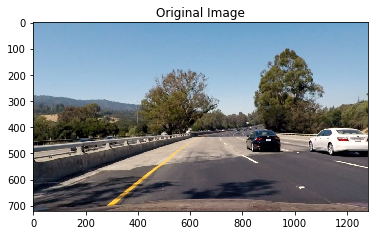

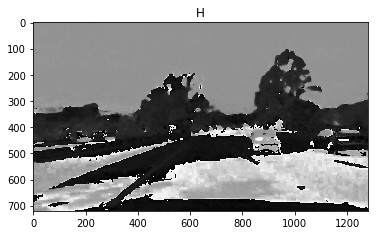

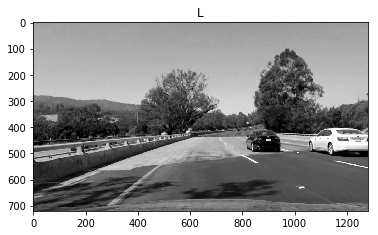

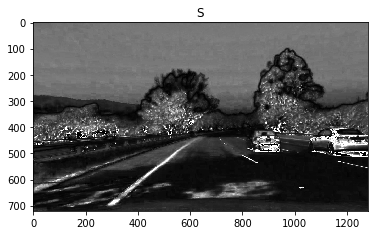

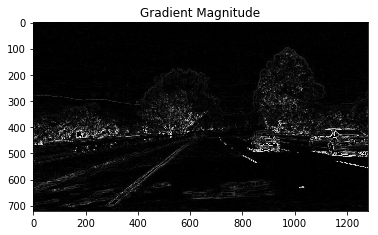

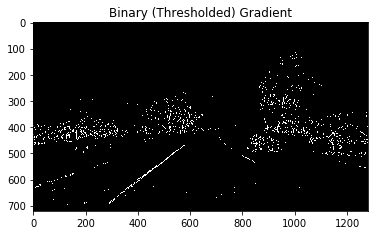

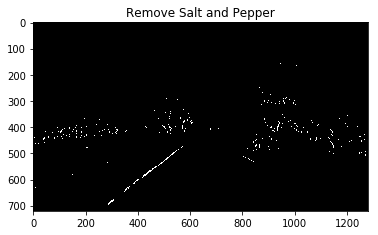

In [39]:
test_imgs = glob.glob('../test_images/*.jpg')
img = cv2.imread(test_imgs[5])
img = cv2.undistort(img, camera_matrix, dist_coeffs, None, camera_matrix)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
H = hls[:, :, 0]
L = hls[:, :, 1]
S = hls[:, :, 2]
plt.figure()
plt.imshow(H, cmap='gray')
plt.title("H")
plt.figure()
plt.imshow(L, cmap='gray')
plt.title("L")
plt.figure()
plt.imshow(S, cmap='gray')
plt.title("S")

# Filter image
fltr_img = S

# Blur
blur_kernel = (5, 5)
img = cv2.GaussianBlur(fltr_img, blur_kernel, 0)

# Sobel
mag_min = 0.4
dir_range = (0, .2)
sobelx = cv2.Sobel(fltr_img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(fltr_img, cv2.CV_64F, 0, 1)
gradmag = (sobelx ** 2 + sobely ** 2) ** 0.5
gradmag = cv2.normalize(gradmag, 0, 255, cv2.NORM_MINMAX)
graddir = np.arctan2((sobely), (sobelx))
graddir = cv2.normalize(graddir, 0, 255, cv2.NORM_MINMAX)
sobel_bin = np.ones_like(graddir)
sobel_bin[(np.abs(graddir) < di r_range[0]) | (np.abs(graddir) > dir_range[1])] = 0
sobel_bin[gradmag < mag_min] = 0

plt.figure()
plt.title("Gradient Magnitude")
plt.imshow(gradmag, cmap='gray')
plt.figure()
plt.title("Binary (Thresholded) Gradient")
plt.imshow(sobel_bin, cmap='gray')

# Remove salt and pepper
box_kernel = (5,5)
box = cv2.boxFilter(sobel_bin, -1, box_kernel, normalize=True)
box_bin = np.ones_like(graddir)
box_bin[box < .5] = 0

plt.figure()
plt.imshow(box_bin, cmap='gray')
plt.title("Remove Salt and Pepper")